In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
#np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

from scipy.stats import pearsonr, spearmanr
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 20,
})

import CNN_classifier_module

#7.7.2021 $(python38) conda install numpy=1.19.5

In [7]:
with CNN_classifier_module.CNN_classifier() as cnn:
    cnn.prepareData()

In [29]:
X = cnn.X_train

In [30]:
X

array([[[1.        , 0.        ],
        [0.55      , 0.00787402],
        [0.7       , 0.01574803],
        ...,
        [0.15      , 0.98425197],
        [0.1       , 0.99212598],
        [0.25      , 1.        ]],

       [[1.        , 0.        ],
        [0.7       , 0.00787402],
        [0.4       , 0.01574803],
        ...,
        [0.05      , 0.98425197],
        [0.15      , 0.99212598],
        [0.25      , 1.        ]],

       [[1.        , 0.        ],
        [0.7       , 0.00787402],
        [0.85      , 0.01574803],
        ...,
        [0.2       , 0.98425197],
        [0.15      , 0.99212598],
        [0.25      , 1.        ]],

       ...,

       [[1.        , 0.        ],
        [0.7       , 0.00787402],
        [0.7       , 0.01574803],
        ...,
        [0.15      , 0.98425197],
        [0.15      , 0.99212598],
        [0.25      , 1.        ]],

       [[1.        , 0.        ],
        [0.55      , 0.00787402],
        [0.7       , 0.01574803],
        .

In [31]:
noise = .1

In [32]:
choice = np.arange(X.shape[1])>=X.shape[1]*(1-noise)

In [33]:
np.random.shuffle(choice)

In [34]:
X[0,choice] = np.nan

In [36]:
X[0]

array([[1.        , 0.        ],
       [0.55      , 0.00787402],
       [0.7       , 0.01574803],
       [0.35      , 0.02362205],
       [0.85      , 0.03149606],
       [0.4       , 0.03937008],
       [0.55      , 0.04724409],
       [0.2       , 0.05511811],
       [0.4       , 0.06299213],
       [0.15      , 0.07086614],
       [0.3       , 0.07874016],
       [0.15      , 0.08661417],
       [0.35      , 0.09448819],
       [0.1       , 0.1023622 ],
       [0.25      , 0.11023622],
       [0.1       , 0.11811024],
       [0.85      , 0.12598425],
       [0.4       , 0.13385827],
       [0.55      , 0.14173228],
       [       nan,        nan],
       [0.        , 0.        ],
       [0.35      , 0.16535433],
       [       nan,        nan],
       [0.15      , 0.18110236],
       [0.35      , 0.18897638],
       [0.1       , 0.19685039],
       [       nan,        nan],
       [0.1       , 0.21259843],
       [0.4       , 0.22047244],
       [0.15      , 0.22834646],
       [0.

In [18]:
import numpy as np
import random
from sklearn import datasets

data = datasets.load_iris()['data']

def dropout(a, percent):
    # create a copy
    mat = a.copy()
    # number of values to replace
    prop = int(mat.size * percent)
    # indices to mask
    mask = random.sample(range(mat.size), prop)
    # replace with NaN
    np.put(mat, mask, [np.NaN]*len(mask))
    return mat

In [19]:
modified = dropout(data, 0.2)

In [20]:
import pandas as pd

In [21]:
dataframe = pd.DataFrame(modified.tolist())

In [22]:
dataframe

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,NaN,3.0,1.4,0.2
2,4.7,NaN,1.3,NaN
3,NaN,3.1,1.5,NaN
4,NaN,3.6,NaN,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,NaN,5.4,2.3


In [23]:
dataframe[0].isnull()

0      False
1       True
2      False
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: 0, Length: 150, dtype: bool

In [24]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
	# count number of rows with missing values
	n_miss = dataframe[[i]].isnull().sum()
	perc = n_miss / dataframe.shape[0] * 100
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

In [25]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


In [26]:

# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.863 (0.055)


>1 0.859 (0.056)
>3 0.862 (0.059)
>5 0.863 (0.055)
>7 0.864 (0.056)
>9 0.859 (0.055)
>15 0.867 (0.052)
>18 0.860 (0.058)
>21 0.861 (0.059)


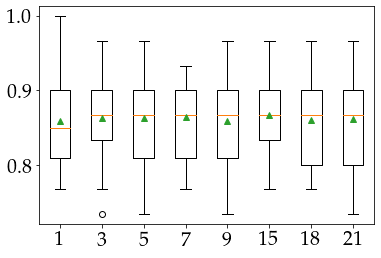

In [27]:
	
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [28]:
# knn imputation strategy and prediction for the hose colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = read_csv(url, header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2
